In [1]:
from useful_scit.imps2.defs import *

In [2]:
p = '/Volumes/mbProD/EBAS_smps_chc_download_2021_08/raw_data_sara/BO0001R.20180101000000.20190917180510.smps.particle_number_size_distribution.aerosol.1y.1h.BO01L_SMPS_UMSA-LAP_CHACALTAYA_BOLIVIA.DE08L_TROPOS_CL_SMPS.lev2.nc'

In [3]:
ds = xr.open_dataset(p)

In [4]:
a=ds['particle_number_size_distribution_amean_ebasmetadata'].values[0][0]

In [5]:
d = ds['particle_number_size_distribution_amean']

In [6]:
d['Dp'] = d['D']*1e9

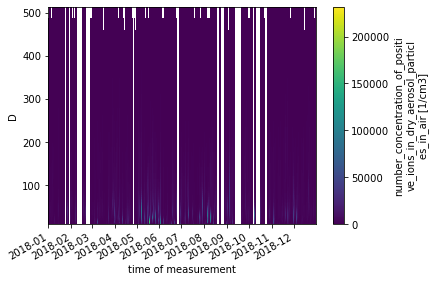

In [7]:
d.plot()

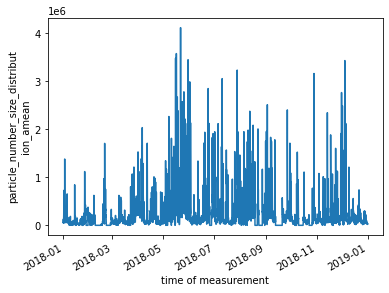

In [8]:
d.sum('D').plot()

/Users/aliaga/miniforge3/envs/q5/lib/python3.9/site-packages/xarray/core/computation.py:742: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


(array([  1.,   0.,   3.,   0.,   2.,   3.,  10.,  11.,  25.,  46.,  68.,
         63., 103., 228., 281., 451., 474., 509., 511., 578., 607., 584.,
        560., 506., 432., 324., 265., 207., 170., 160., 129.,  99.,  94.,
         57.,  21.,  10.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.]),
 array([3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2,
        4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5,
        5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8,
        6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1,
        8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3, 9.4,
        9.5, 9.6, 9.7, 9.8, 9.9]),
 <BarContainer object of 69 artists>)

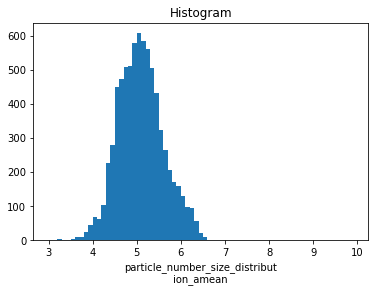

In [9]:
np.log10(d.sum('D')).plot.hist(bins=np.arange(3,10,.1))

In [10]:
from xarray.plot.plot import _infer_interval_breaks as infer_interval_breaks

In [11]:
dD = np.log10(infer_interval_breaks(d['Dp']))

d['dlDp']=d['Dp'] * 0 + dD[1:]-dD[:-1]

In [12]:
Nt = (d['dlDp'] * d).sum('D')

Text(0, 0.5, 'SMPS #/cm3 SPT')

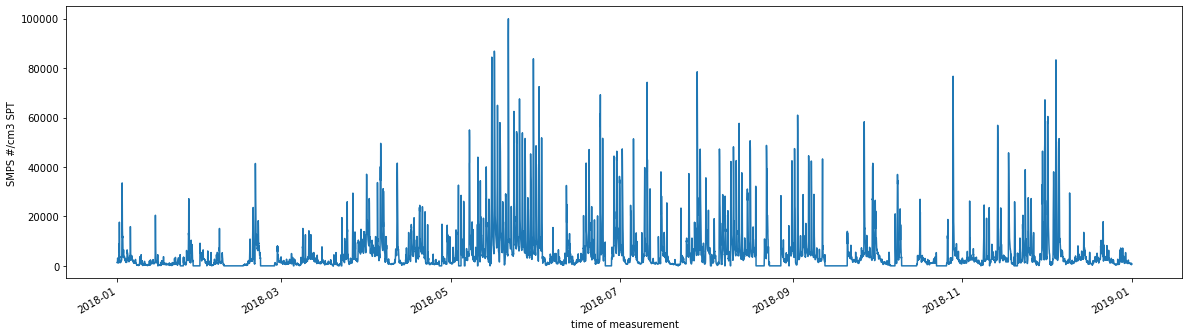

In [13]:
Nt.plot(figsize=(20,5))
ax = plt.gca()
ax.set_ylabel('SMPS #/cm3 SPT')

In [14]:
p='/Volumes/mbProD/EBAS_smps_chc_download_2021_08/raw_data_sara/v01/smps_chc_data.nc'

In [15]:
da = xr.open_dataarray(p)

In [16]:
dD = np.log10(infer_interval_breaks(da['Dp']))

da['dlDp']=da['Dp'] * 0 + dD[1:]-dD[:-1]

Text(0, 0.5, 'SMPS #/cm3 SPT')

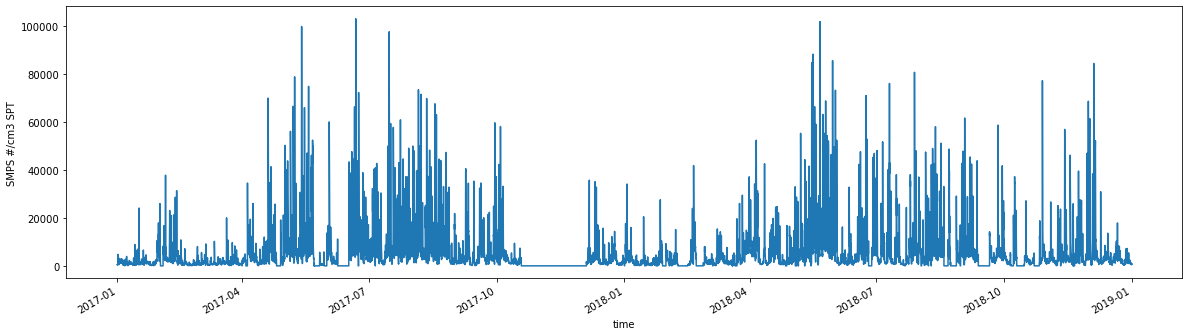

In [17]:
(da * da['dlDp']).sum('lDp').plot(figsize=(20,5),x='time')
ax = plt.gca()
ax.set_ylabel('SMPS #/cm3 SPT')

Text(0, 0.5, 'SMPS #/cm3 SPT')

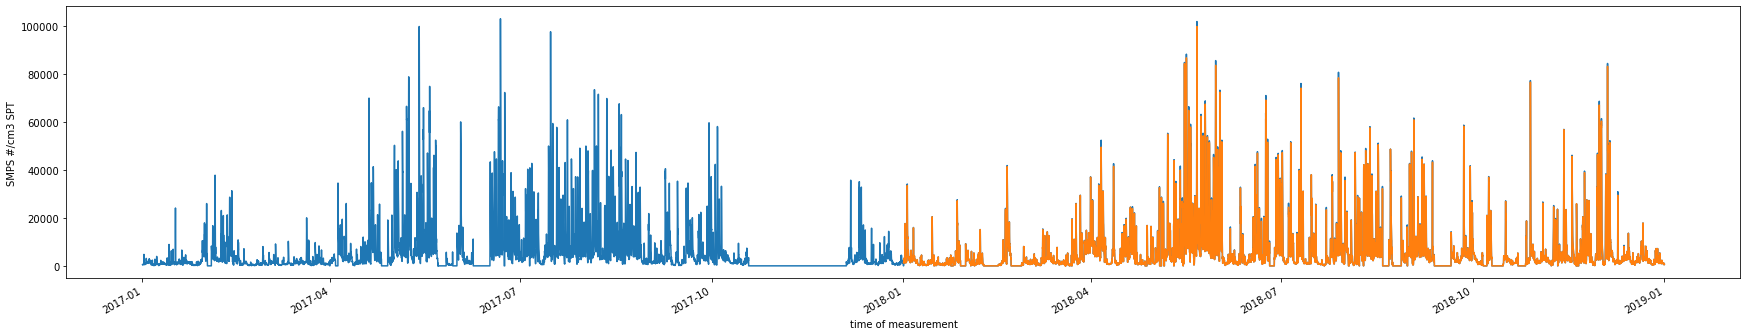

In [18]:

(da * da['dlDp']).sum('lDp').plot(figsize=(30,5),x='time')
Nt.plot()
ax = plt.gca()
ax.set_ylabel('SMPS #/cm3 SPT')